In [47]:
import numpy as np
import cv2
from scipy.interpolate import UnivariateSpline
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
path='workingimage.jpg'

In [49]:
img=mpimg.imread(path)

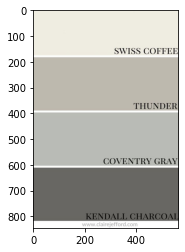

In [50]:
plt.rcParams['figure.figsize']==[18,15] #making sure image is right size
plt.imshow(img)

In [51]:
def mapping_function(x,y):#uses anchor points given and interpolates unknown values
    spl=UnivariateSpline(x,y)
    return spl(range(256))#range for 8 bit images


In [52]:
def warm(image):#increases reds decreases blues
    increase=mapping_function([0,64,128,192,256],[0,70,140,210,256])
    decrease=mapping_function([0,64,128,192,256],[0,40,90,150,256])
    red,green,blue=cv2.split(image)
    red=cv2.LUT(red,increase).astype(np.uint8)
    blue=cv2.LUT(blue,decrease).astype(np.uint8)
    image=cv2.merge((red,green,blue))
    return image
def cool(image):#increases blue decreases reds
    increase=mapping_function([0,64,128,192,256],[0,70,140,210,256])
    decrease=mapping_function([0,64,128,192,256],[0,40,90,150,256])
    red,green,blue=cv2.split(image)
    red=cv2.LUT(red,decrease).astype(np.uint8)
    blue=cv2.LUT(blue,increase).astype(np.uint8)
    image=cv2.merge((red,green,blue))
    return image


    

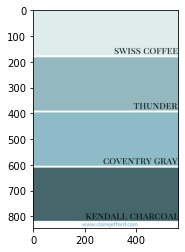

In [53]:
new_image=cool(img)
plt.imshow(new_image)

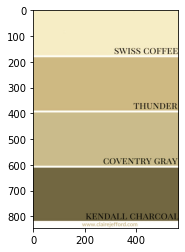

In [54]:
new_image=warm(img)
plt.imshow(new_image)

In [55]:
from ipywidgets import interact,interactive,fixed
import ipywidgets as widgets

def choice(x,img):
    if x =='Warm':
        return plt.imshow(warm(img))
    if x=='Cool':
        return plt.imshow(cool(img))
    if x=='No filter':
        return plt.imshow(img)

In [56]:
interact(choice, x=widgets.Dropdown(options=['No filter','Warm','Cool'],description='Choose Filter'),img=fixed(img));

interactive(children=(Dropdown(description='Choose Filter', options=('No filter', 'Warm', 'Cool'), value='No f…